In [171]:
## Hierro, Gershwin
## Lluisma, Arthur
## Umbay, Marie

In [172]:
import pandas as pd

# Data Cleaning
# Values with -200 are replaced with 0 in the csv directly.
df = pd.read_csv('AirQualityUCI.csv', sep = ';')
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.')
df['T'] = df['T'].str.replace(',','.')
df['RH'] = df['RH'].str.replace(',','.')
df['AH'] = df['AH'].str.replace(',','.')
df = df.drop('Unnamed: 15', axis=1)
df = df.drop('Unnamed: 16', axis=1)
df[['CO(GT)', 'C6H6(GT)','T', 'RH', 'AH']] = df[['CO(GT)', 'C6H6(GT)','T', 'RH', 'AH']].apply(pd.to_numeric)

df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6         1360       150      11.9   
1  10/03/2004  19.00.00     2.0         1292       112       9.4   
2  10/03/2004  20.00.00     2.2         1402        88       9.0   
3  10/03/2004  21.00.00     2.2         1376        80       9.2   
4  10/03/2004  22.00.00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [173]:
import pandas as pd
import numpy as np
def create_time_series_dataset(df, column_name, window_size):
    """
    Create a dataset with overlapping windows for time series prediction.

    Parameters:
    - df: pandas DataFrame containing the time series data.
    - column_name: string, the name of the column with the time series data.
    - window_size: int, the size of the window to use for each sample.

    Returns:
    - X: pandas DataFrame with the past observations.
    - y: pandas Series with the next value to predict.
    """
    # Extract the relevant column
    series = df[column_name].values

    # Initialize lists to hold the data
    X = []
    y = []

    # Create windows
    for i in range(len(series) - window_size):
        window = series[i:i + window_size]
        next_value = series[i + window_size]
        X.append(window)
        y.append(next_value)

    # Convert lists to DataFrame/Series
    X = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(window_size)])
    y = pd.Series(y, name='y')

    return X, y

In [174]:
## FOR CO(GT)
##

In [175]:
window_size = 100  # x_1 to x_100
X, y = create_time_series_dataset(df, 'CO(GT)', window_size)


print("X:")
print(X.head())

print("\ny:")
print(y.head())

X:
    x1   x2   x3   x4   x5   x6   x7   x8   x9  x10  ...  x91  x92  x93  x94  \
0  2.6  2.0  2.2  2.2  1.6  1.2  1.2  1.0  0.9  0.6  ...  2.8  2.0  1.8  1.9   
1  2.0  2.2  2.2  1.6  1.2  1.2  1.0  0.9  0.6  0.0  ...  2.0  1.8  1.9  3.0   
2  2.2  2.2  1.6  1.2  1.2  1.0  0.9  0.6  0.0  0.7  ...  1.8  1.9  3.0  2.9   
3  2.2  1.6  1.2  1.2  1.0  0.9  0.6  0.0  0.7  0.7  ...  1.9  3.0  2.9  2.5   
4  1.6  1.2  1.2  1.0  0.9  0.6  0.0  0.7  0.7  1.1  ...  3.0  2.9  2.5  4.6   

   x95  x96  x97  x98  x99  x100  
0  3.0  2.9  2.5  4.6  5.9   3.4  
1  2.9  2.5  4.6  5.9  3.4   2.1  
2  2.5  4.6  5.9  3.4  2.1   2.2  
3  4.6  5.9  3.4  2.1  2.2   1.8  
4  5.9  3.4  2.1  2.2  1.8   1.8  

[5 rows x 100 columns]

y:
0    2.1
1    2.2
2    1.8
3    1.8
4    1.8
Name: y, dtype: float64


In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


split_index = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 0.3611
      Actual  Predicted
7405     3.8      2.877
7406     2.7      3.072
7407     3.1      2.449
7408     3.1      2.942
7409     3.2      2.995


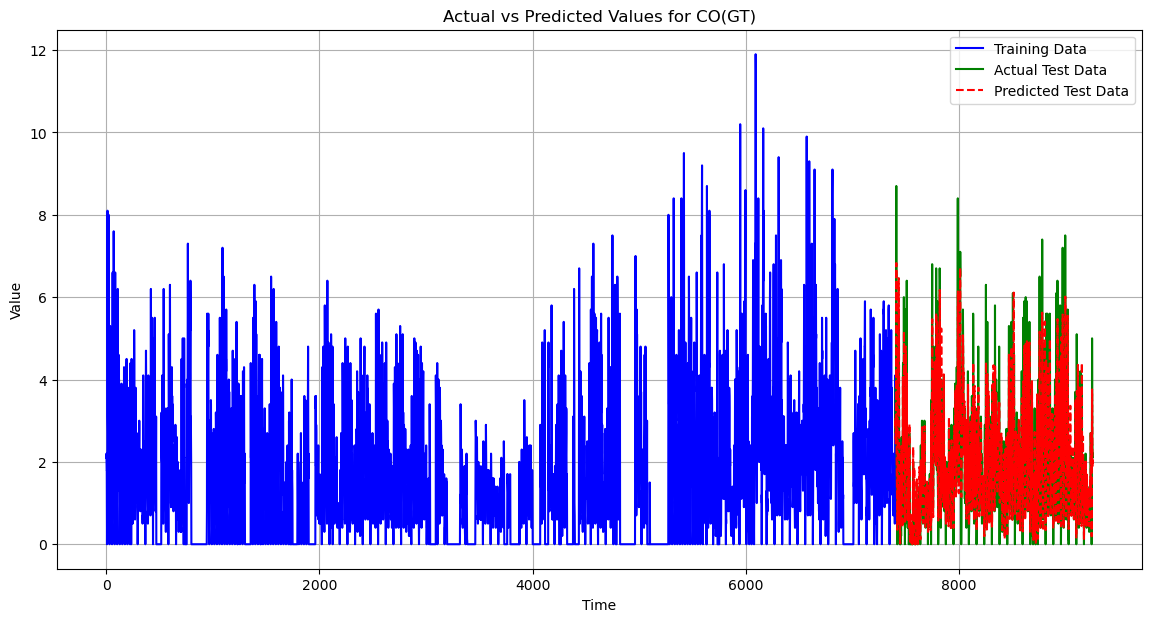

In [177]:
import matplotlib.pyplot as plt


time_index_train = range(len(X_train))
time_index_test = range(len(X_train), len(X_train) + len(X_test))


plt.figure(figsize=(14, 7))
plt.plot(time_index_train, y_train, label='Training Data', color='blue')
plt.plot(time_index_test, y_test, label='Actual Test Data', color='green')
plt.plot(time_index_test, y_pred, label='Predicted Test Data', color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for CO(GT)')
plt.legend()
plt.grid(True)


plt.show()

In [178]:
## For NMHC(GT)
##

In [179]:
window_size = 100  
X, y = create_time_series_dataset(df, 'NMHC(GT)', window_size)


print("X:")
print(X.head())

print("\ny:")
print(y.head())

X:
    x1   x2  x3  x4  x5  x6  x7  x8  x9  x10  ...  x91  x92  x93  x94  x95  \
0  150  112  88  80  51  38  31  31  24   19  ...  145   93   84   99  150   
1  112   88  80  51  38  31  31  24  19   14  ...   93   84   99  150  156   
2   88   80  51  38  31  31  24  19  14    8  ...   84   99  150  156  122   
3   80   51  38  31  31  24  19  14   8   16  ...   99  150  156  122  262   
4   51   38  31  31  24  19  14   8  16   29  ...  150  156  122  262  341   

   x96  x97  x98  x99  x100  
0  156  122  262  341   214  
1  122  262  341  214   100  
2  262  341  214  100    79  
3  341  214  100   79    66  
4  214  100   79   66    73  

[5 rows x 100 columns]

y:
0    100
1     79
2     66
3     73
4     66
Name: y, dtype: int64


In [180]:
# Split the data 
split_index = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 0.0059
      Actual  Predicted
7405       0   0.076746
7406       0   0.076746
7407       0   0.076746
7408       0   0.076746
7409       0   0.076746


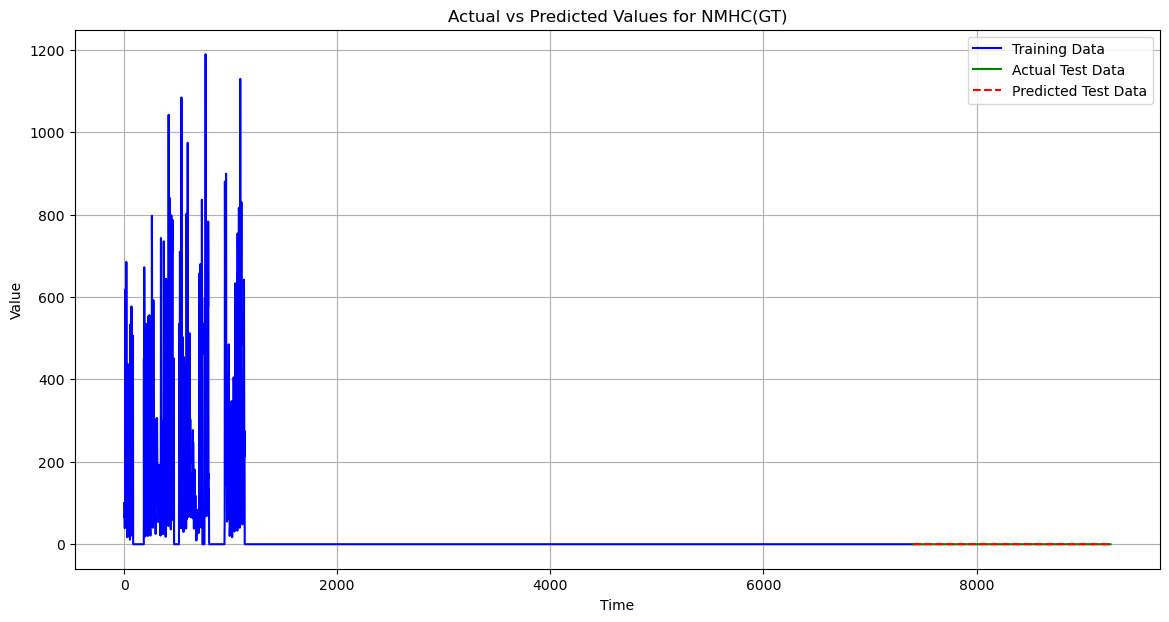

In [181]:
## Plotting
time_index_train = range(len(X_train))
time_index_test = range(len(X_train), len(X_train) + len(X_test))


plt.figure(figsize=(14, 7))
plt.plot(time_index_train, y_train, label='Training Data', color='blue')
plt.plot(time_index_test, y_test, label='Actual Test Data', color='green')
plt.plot(time_index_test, y_pred, label='Predicted Test Data', color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for NMHC(GT)')
plt.legend()
plt.grid(True)


plt.show()

In [182]:
## FOR C6H6(GT)

In [183]:
window_size = 100  
X, y = create_time_series_dataset(df, 'C6H6(GT)', window_size)

print("X:")
print(X.head())

print("\ny:")
print(y.head())

X:
     x1   x2   x3   x4   x5   x6   x7   x8   x9  x10  ...   x91   x92   x93  \
0  11.9  9.4  9.0  9.2  6.5  4.7  3.6  3.3  2.3  1.7  ...  10.7   7.5   7.5   
1   9.4  9.0  9.2  6.5  4.7  3.6  3.3  2.3  1.7  1.3  ...   7.5   7.5   8.2   
2   9.0  9.2  6.5  4.7  3.6  3.3  2.3  1.7  1.3  1.1  ...   7.5   8.2  11.9   
3   9.2  6.5  4.7  3.6  3.3  2.3  1.7  1.3  1.1  1.6  ...   8.2  11.9  12.0   
4   6.5  4.7  3.6  3.3  2.3  1.7  1.3  1.1  1.6  3.2  ...  11.9  12.0  12.2   

    x94   x95   x96   x97   x98   x99  x100  
0   8.2  11.9  12.0  12.2  20.6  23.1  14.7  
1  11.9  12.0  12.2  20.6  23.1  14.7   9.0  
2  12.0  12.2  20.6  23.1  14.7   9.0   8.8  
3  12.2  20.6  23.1  14.7   9.0   8.8   7.4  
4  20.6  23.1  14.7   9.0   8.8   7.4   6.9  

[5 rows x 100 columns]

y:
0    9.0
1    8.8
2    7.4
3    6.9
4    7.0
Name: y, dtype: float64


In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


split_index = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 7.7190
      Actual  Predicted
7405    15.1     13.420
7406    13.4     14.216
7407    14.5     12.821
7408    14.7     14.042
7409    17.0     14.522


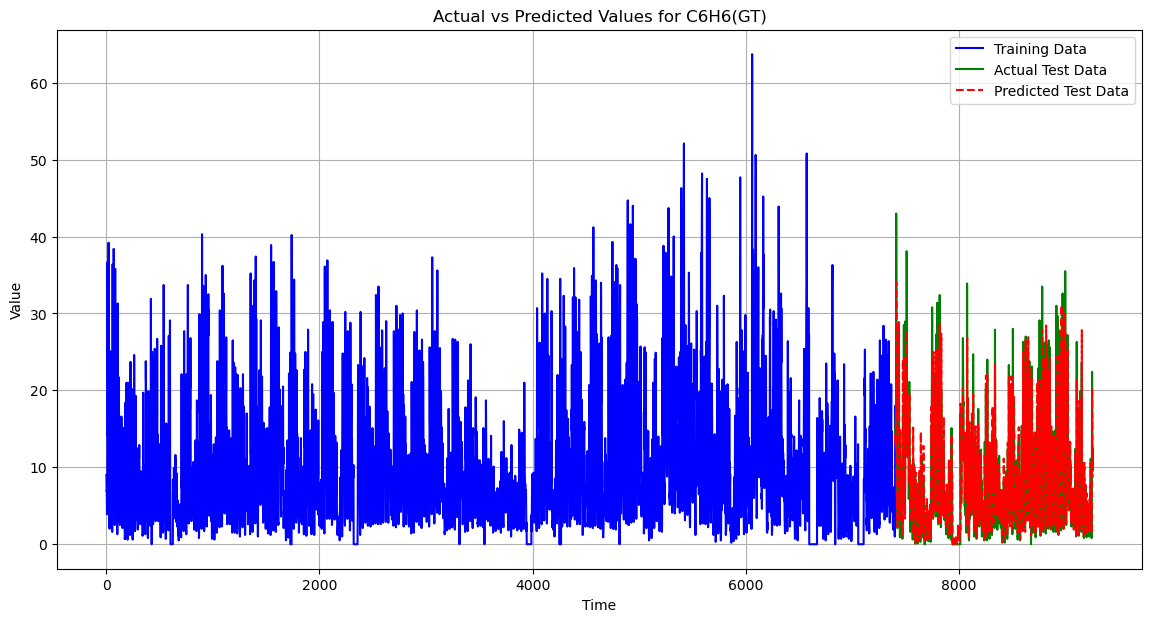

In [185]:
import matplotlib.pyplot as plt


time_index_train = range(len(X_train))
time_index_test = range(len(X_train), len(X_train) + len(X_test))


plt.figure(figsize=(14, 7))
plt.plot(time_index_train, y_train, label='Training Data', color='blue')
plt.plot(time_index_test, y_test, label='Actual Test Data', color='green')
plt.plot(time_index_test, y_pred, label='Predicted Test Data', color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for C6H6(GT)')
plt.legend()
plt.grid(True)


plt.show()

In [186]:
## FOR NOx(GT)
##

In [187]:
window_size = 100  
X, y = create_time_series_dataset(df, 'NOx(GT)', window_size)


print("X:")
print(X.head())

print("\ny:")
print(y.head())

X:
    x1   x2   x3   x4   x5  x6  x7  x8  x9  x10  ...  x91  x92  x93  x94  x95  \
0  166  103  131  172  131  89  62  62  45    0  ...  161  113  103  112  170   
1  103  131  172  131   89  62  62  45   0   21  ...  113  103  112  170  180   
2  131  172  131   89   62  62  45   0  21   16  ...  103  112  170  180  160   
3  172  131   89   62   62  45   0  21  16   34  ...  112  170  180  160  261   
4  131   89   62   62   45   0  21  16  34   98  ...  170  180  160  261  325   

   x96  x97  x98  x99  x100  
0  180  160  261  325   217  
1  160  261  325  217   146  
2  261  325  217  146   152  
3  325  217  146  152   104  
4  217  146  152  104   106  

[5 rows x 100 columns]

y:
0    146
1    152
2    104
3    106
4    108
Name: y, dtype: int64


In [188]:

split_index = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 9092.0542
      Actual  Predicted
7405     721     510.46
7406     474     648.04
7407     514     433.81
7408     504     505.64
7409     508     503.61


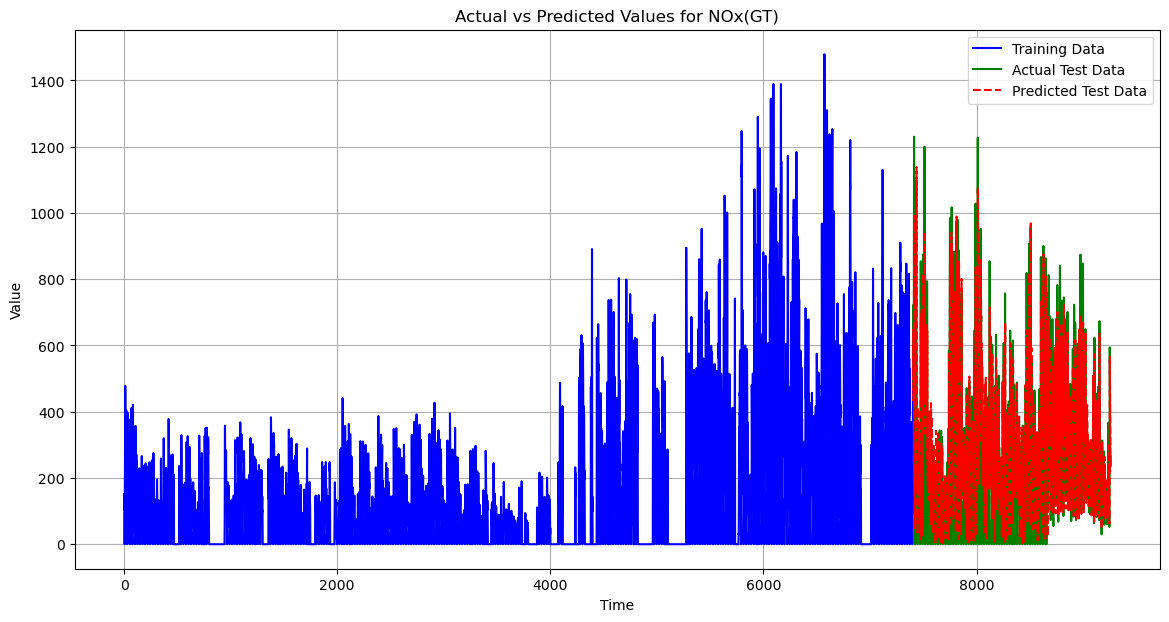

In [189]:

time_index_train = range(len(X_train))
time_index_test = range(len(X_train), len(X_train) + len(X_test))


plt.figure(figsize=(14, 7))
plt.plot(time_index_train, y_train, label='Training Data', color='blue')
plt.plot(time_index_test, y_test, label='Actual Test Data', color='green')
plt.plot(time_index_test, y_pred, label='Predicted Test Data', color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for NOx(GT)')
plt.legend()
plt.grid(True)


plt.show()